In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import pandas as pd

data = pd.read_csv('Student_Mental_health (1).csv')


In [5]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os


In [6]:
#df = pd.read_csv('Student_Mental_health (1).csv')
df=pd.read_csv('Student Mental health.csv')
df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [7]:
df.shape

(101, 11)

In [8]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [9]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [11]:
print(df.columns)

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


In [12]:
df.columns = ['Timestamp','Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [13]:
df['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [14]:
def Clean(Text):
    Text = str(Text)
    Text = Text[-1]
    Text = int(Text)
    return Text

df["Year"] = df["Year"].apply(Clean)

print("First three values of Year after cleaning text:")
print(df["Year"][:3], "\n")


First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [15]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [16]:
def remove_space(string):
    string = str(string).strip()
    return string

df["CGPA"] = df["CGPA"].apply(remove_space)

print("First three values of CGPA after cleaning text:")
print(df["CGPA"][:3], "\n")
print(df['CGPA'].unique())


First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [17]:
len(df['Course'].unique())

49

In [18]:
df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(df['Course'].unique())

37

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


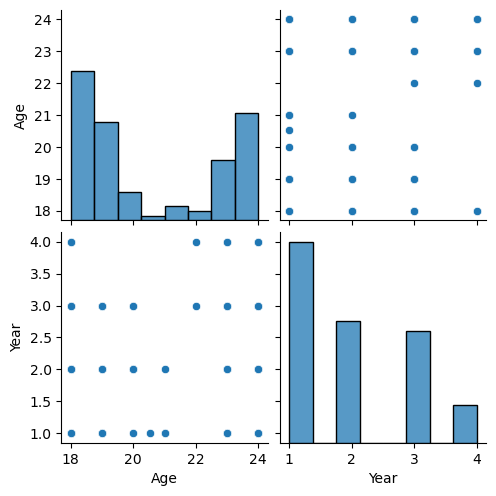

In [19]:
sns.pairplot(df)


[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

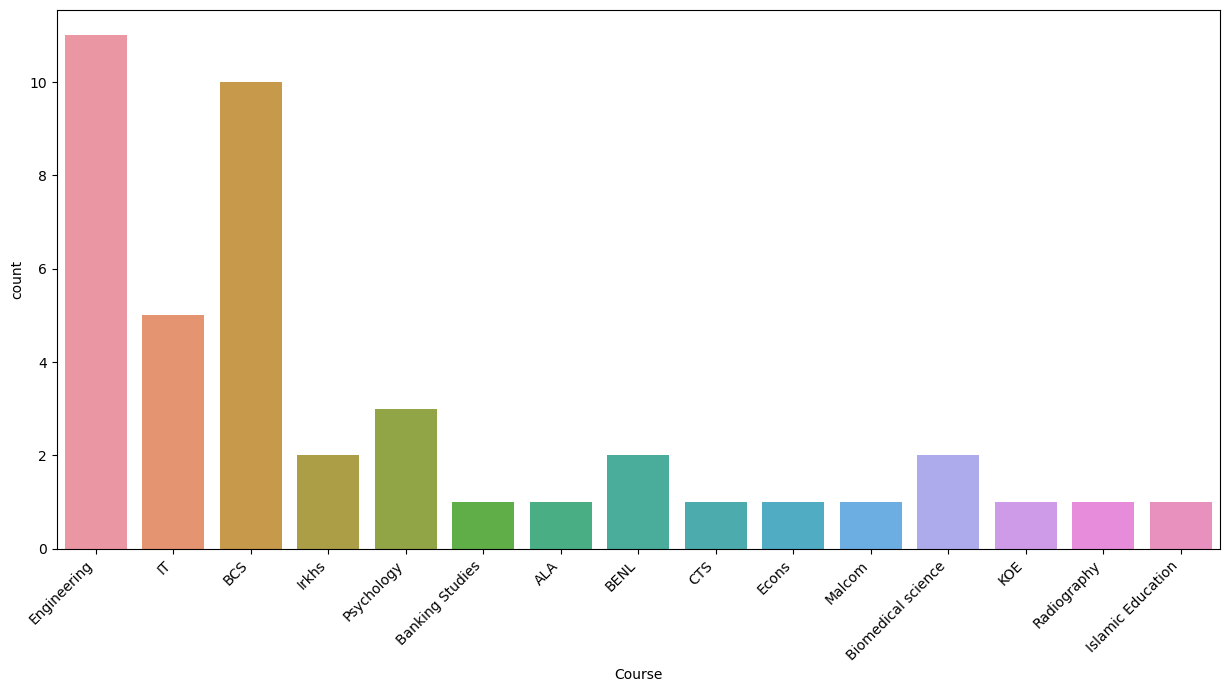

In [20]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = df[df['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

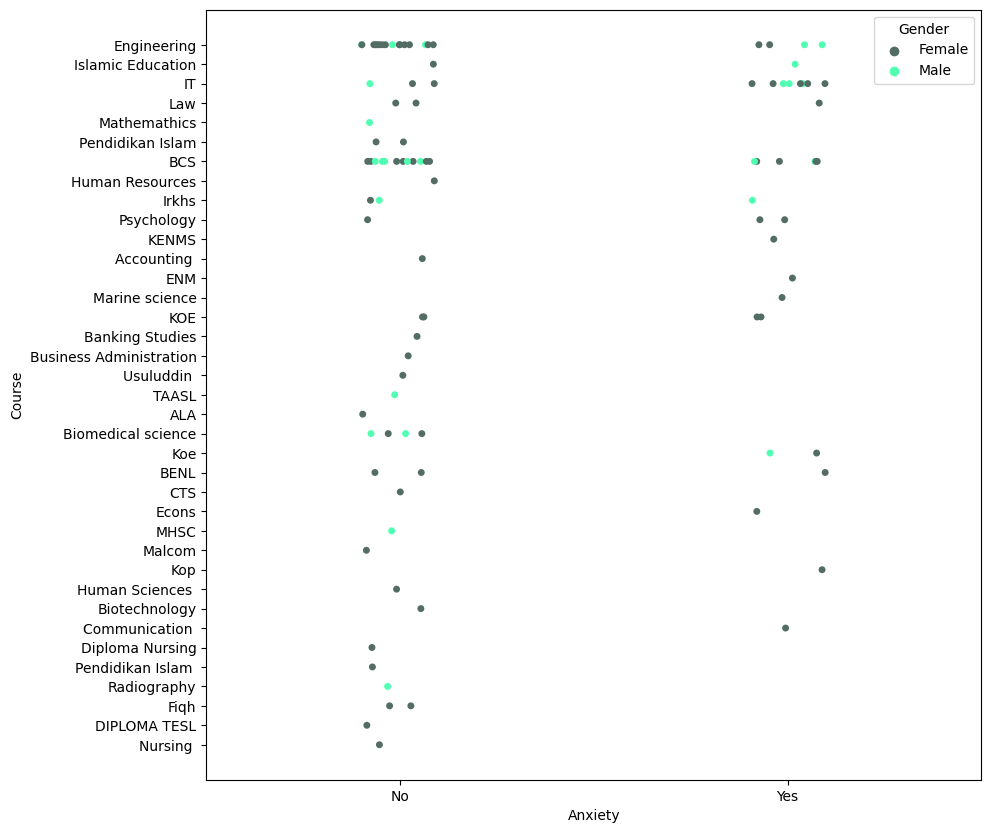

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.stripplot(x='Anxiety', y='Course', hue='Gender', data=df, palette=['#546D64', '#50FFB1'])
plt.show()

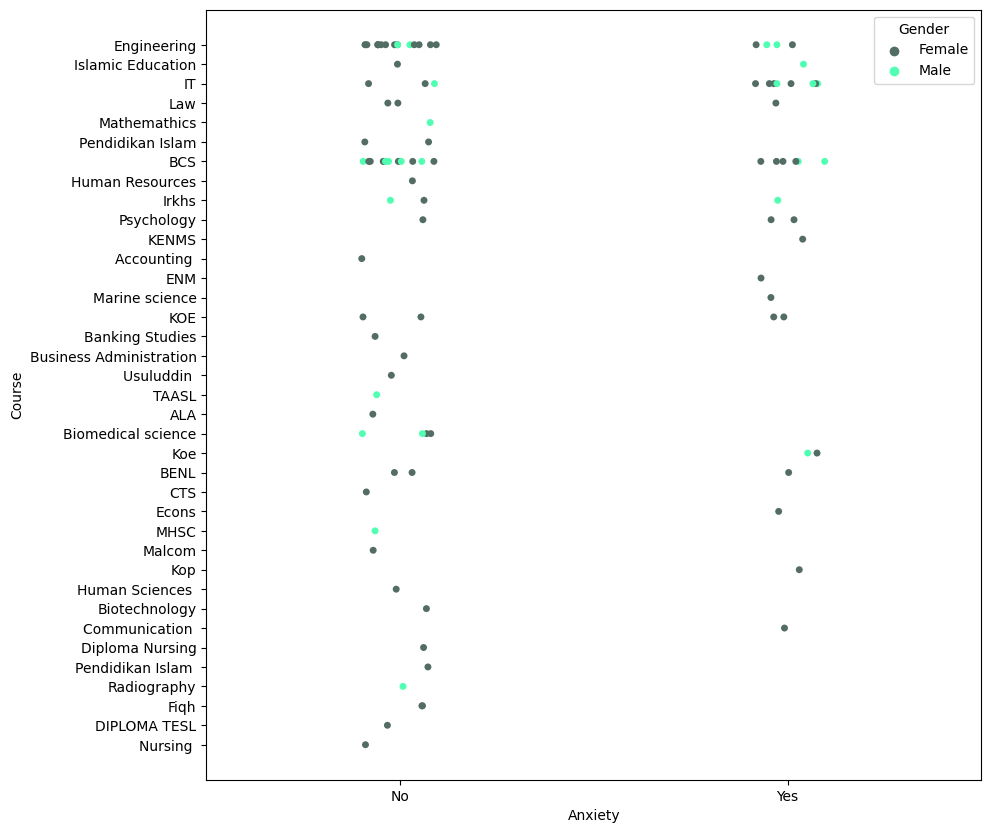

In [22]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = df, palette = ['#546D64', '#50FFB1'])
plt.show()

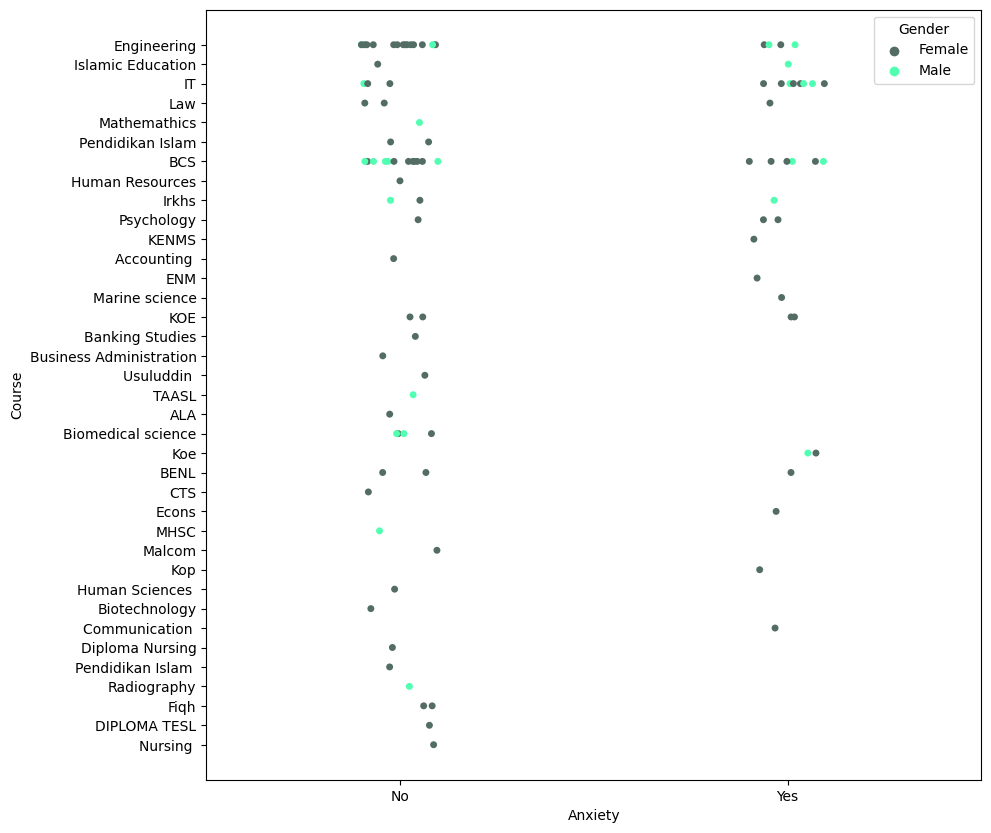

In [23]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = df, palette = ['#546D64', '#50FFB1'])
plt.show()

In [24]:
unique_courses = df['Course'].unique()
num_unique_courses = len(unique_courses)

print("Unique Courses:")
for course in unique_courses:
    print(course)

print("Number of Unique Courses:", num_unique_courses)


Unique Courses:
Engineering
Islamic Education
IT
Law
Mathemathics
Pendidikan Islam
BCS
Human Resources
Irkhs
Psychology
KENMS
Accounting 
ENM
Marine science
KOE
Banking Studies
Business Administration
Usuluddin 
TAASL
ALA
Biomedical science
Koe
BENL
CTS
Econs
MHSC
Malcom
Kop
Human Sciences 
Biotechnology
Communication 
Diploma Nursing
Pendidikan Islam 
Radiography
Fiqh
DIPLOMA TESL
Nursing 
Number of Unique Courses: 37


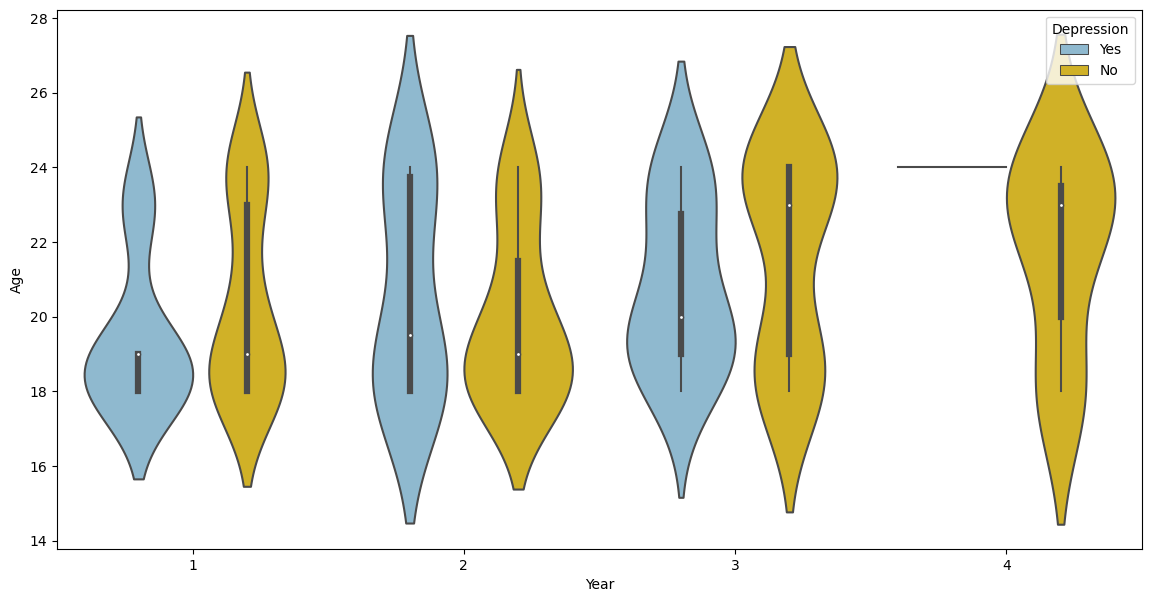

In [25]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = df,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

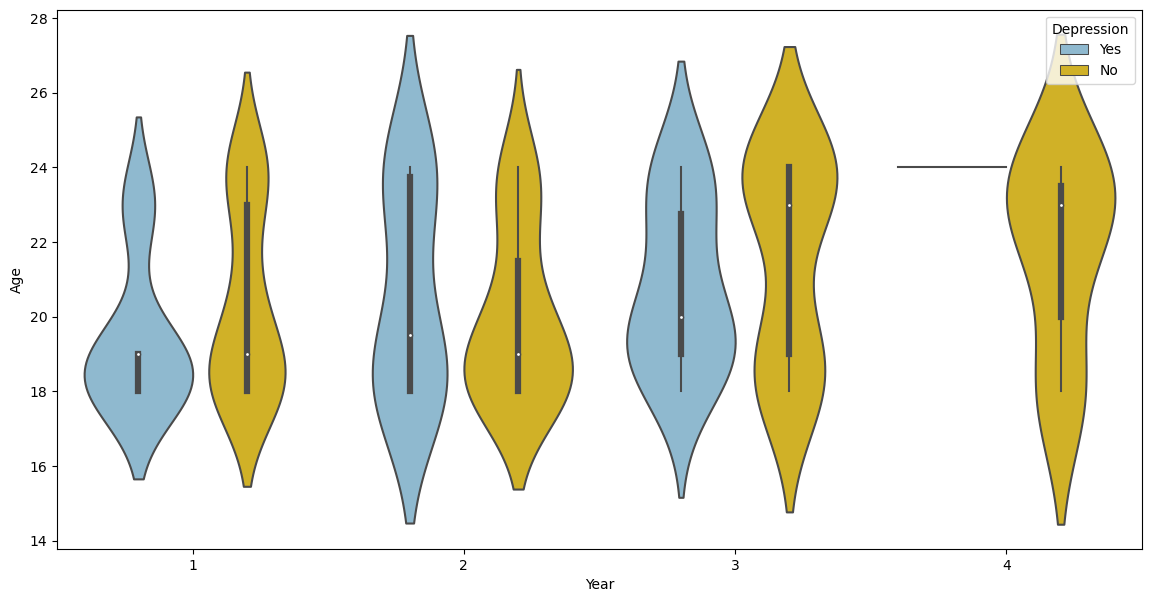

In [26]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = df,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

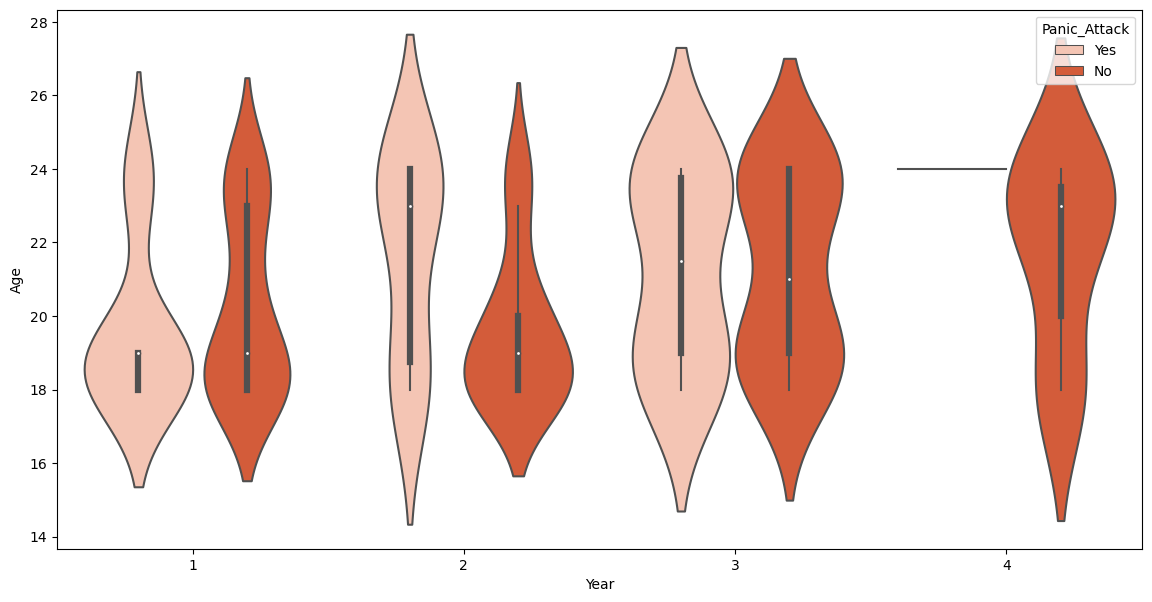

In [27]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = df,  hue = 'Panic_Attack', palette = ['#FEC0AA', '#EC4E20'])
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


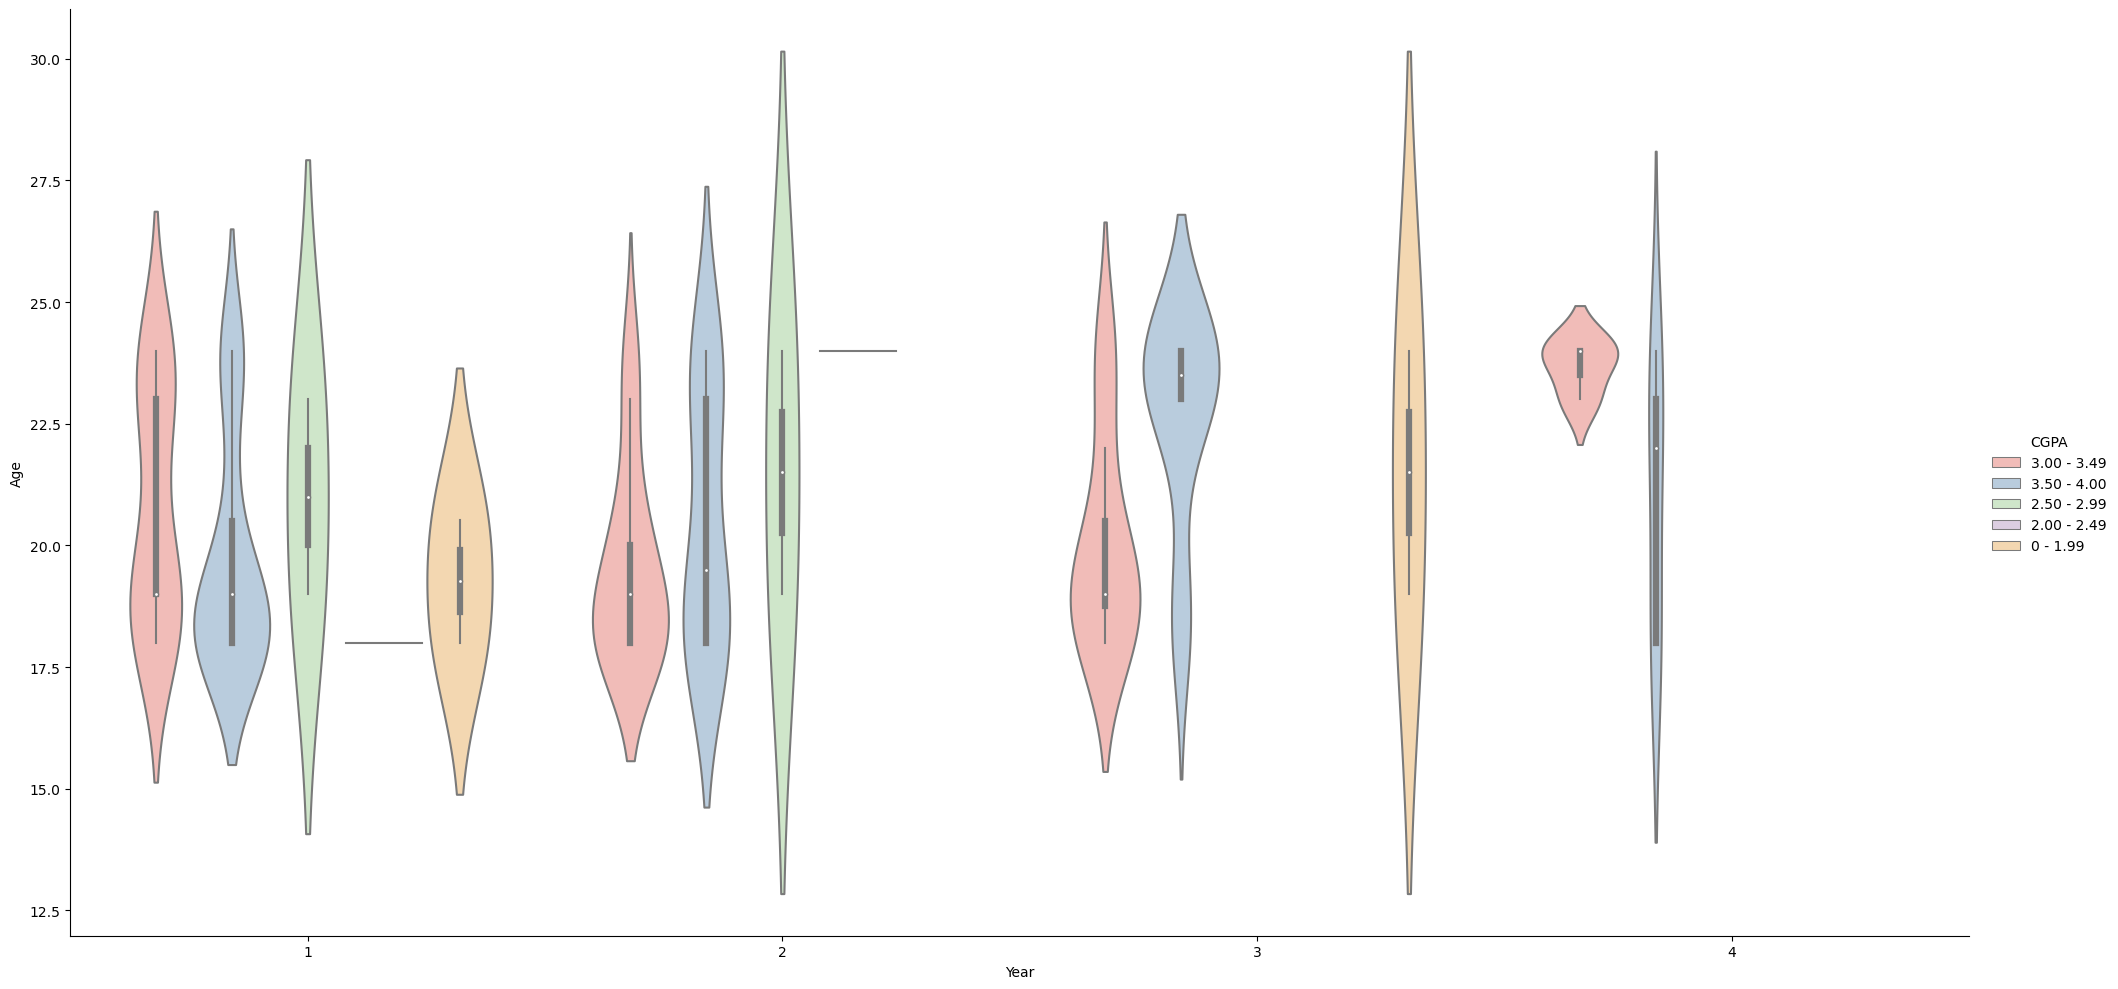

In [28]:
sns.catplot(data=df, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=10,aspect=2)

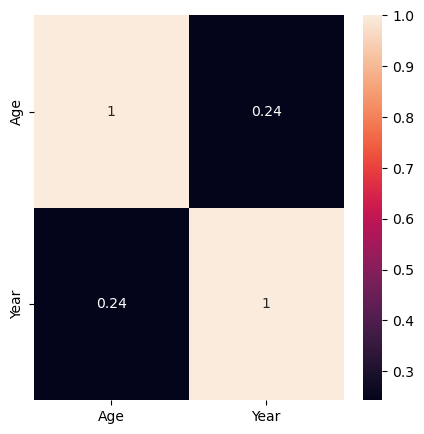

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Check and handle non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns
corrmat = numeric_columns.corr()  # Calculate the correlation matrix

plt.figure(figsize=(5, 5))
sns.heatmap(corrmat, annot=True, cmap=None)
plt.show()


In [30]:
df.head(20)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in df.columns if df.dtypes[x] == 'object']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,23,0,18.0,14,1,3,0,1,0,1,0
1,24,1,21.0,20,2,3,0,0,1,0,0
2,25,1,19.0,18,1,3,0,1,1,1,0
3,26,0,22.0,25,3,3,1,1,0,0,0
4,27,1,23.0,29,4,3,0,0,0,0,0


<Axes: >

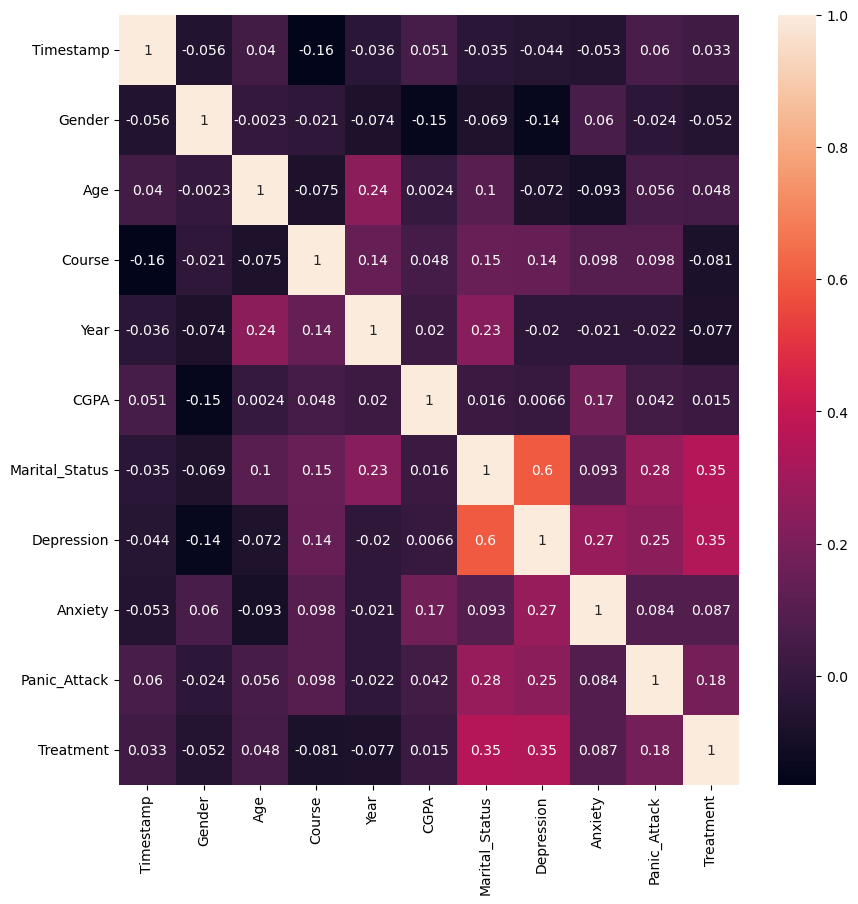

In [32]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

Logistic Regression: 0.557143 
Decision Tree: 0.457143 
Random Forest: 0.585714 
SVC: 0.485714 
0.25806451612903225
********* Random Forest Results *********
Accuracy    :  0.3225806451612903
Recall      :  0.3225806451612903
Precision   :  0.3207373271889401
F1 Score    :  0.3225806451612903
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.40      0.24      0.30        17
           4       0.29      0.55      0.37        11

    accuracy                           0.32        31
   macro avg       0.14      0.16      0.13        31
weighted avg       0.32      0.32      0.30        31



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set 

<Axes: >

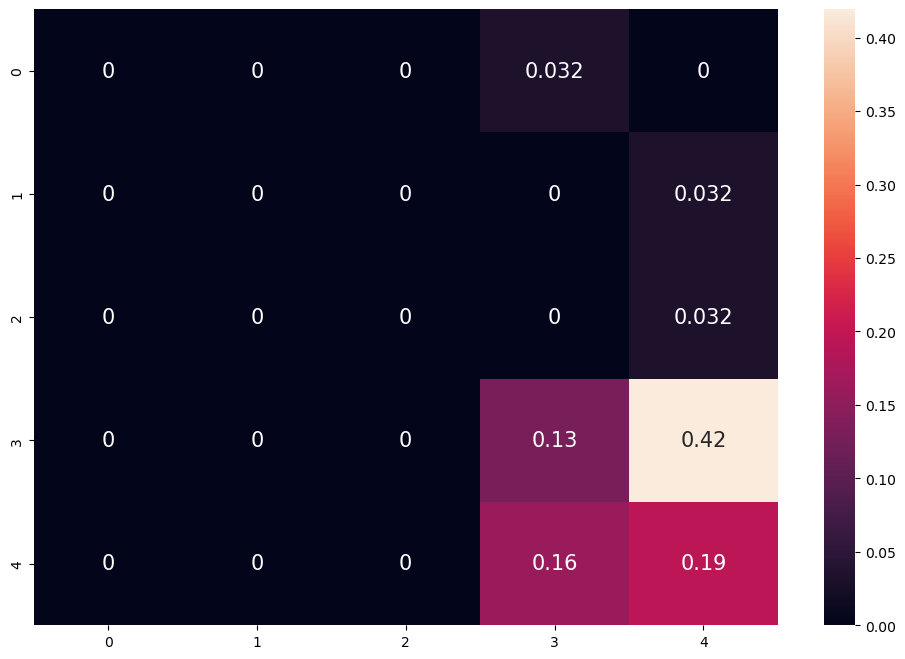

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df.fillna(method='ffill', inplace=True)

X = df.drop(["CGPA"], axis=1)
y = df["CGPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: "SVC"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
predictions = RF_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

print(classification_report(y_test, predictions))

plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=None, annot=True, annot_kws={'size': 15})



********* Random Forest Results *********
Accuracy    :  0.22580645161290322
Recall      :  0.22580645161290322
Precision   :  0.22052785923753665
F1 Score    :  0.20908280065408058
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.27      0.18      0.21        17
           4       0.20      0.36      0.26        11

    accuracy                           0.23        31
   macro avg       0.09      0.11      0.09        31
weighted avg       0.22      0.23      0.21        31



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packag

<Axes: >

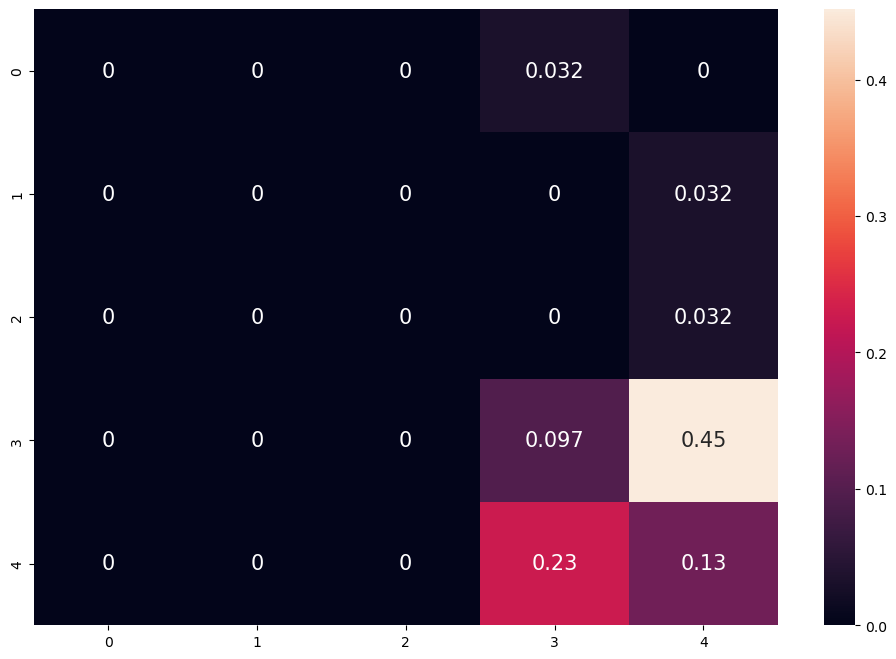

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Handle missing values (replace NaNs with forward fill)
df.fillna(method='ffill', inplace=True)

X = df.drop(["CGPA"], axis=1)
y = df["CGPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])

pipeline_rf.fit(X_train, y_train)

# Save the trained Random Forest model as "CGPA_model.pkl"
model_filename = "CGPA_model.pkl"
joblib.dump(pipeline_rf, model_filename)

# Load the model later if needed
loaded_model = joblib.load(model_filename)

# Predictions on the test set using the loaded model
predictions = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)

print(classification_report(y_test, predictions))

plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=None, annot=True, annot_kws={'size': 15})


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming you have loaded your data into the 'data' DataFrame

# Handle missing values (replace NaNs with forward fill)
df.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Depression'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Predictions on the test set
predictions = RF_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)


Logistic Regression: 0.814286 
Decision Tree: 0.728571 
RandomForest: 0.771429 
SVC: 0.671429 
********* Random Forest Results *********
Accuracy    :  0.7741935483870968
Recall      :  0.7741935483870968
Precision   :  0.7860215053763441
F1 Score    :  0.7535315201349357


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.83      0.45      0.59        11

    accuracy                           0.77        31
   macro avg       0.80      0.70      0.72        31
weighted avg       0.79      0.77      0.75        31



<Axes: >

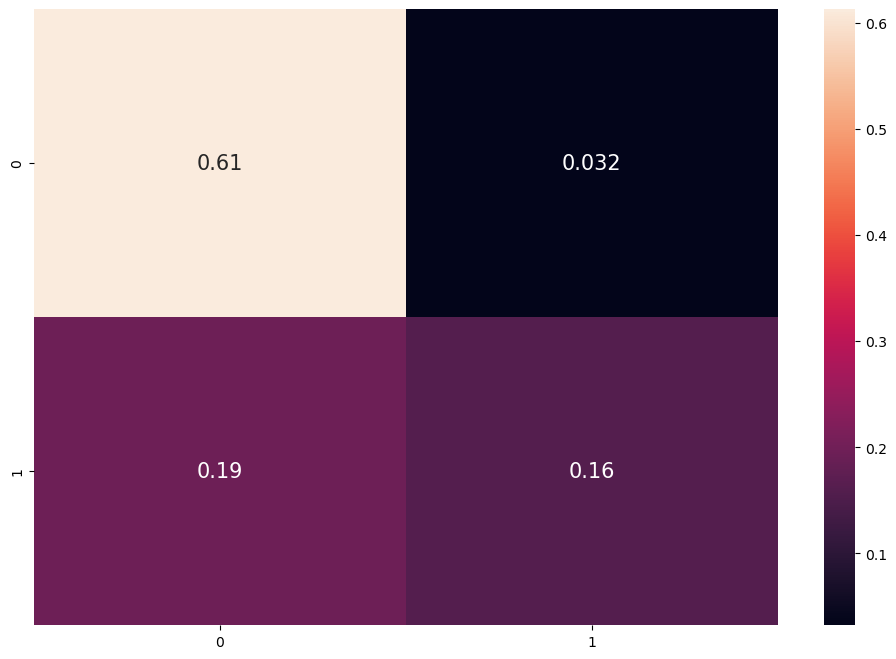

In [37]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib

# Handle missing values (replace NaNs with forward fill)
df.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Depression'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Save the trained Random Forest model as "Depression_model.pkl"
model_filename = "Depression_model.pkl"
joblib.dump(RF_model, model_filename)

# Load the model later if needed
loaded_model = joblib.load(model_filename)

# Predictions on the test set using the loaded model
predictions = loaded_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)


Logistic Regression: 0.814286 
Decision Tree: 0.728571 
RandomForest: 0.785714 
SVC: 0.671429 
********* Random Forest Results *********
Accuracy    :  0.7741935483870968
Recall      :  0.7741935483870968
Precision   :  0.7860215053763441
F1 Score    :  0.7535315201349357


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib

# Handle missing values (replace NaNs with forward fill)
df.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Anxiety'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Save the trained Random Forest model as "Depression_model.pkl"
model_filename = "Anxiety_model.pkl"
joblib.dump(RF_model, model_filename)

# Load the model later if needed
loaded_model = joblib.load(model_filename)

# Predictions on the test set using the loaded model
predictions = loaded_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)


Logistic Regression: 0.557143 
Decision Tree: 0.628571 
RandomForest: 0.557143 
SVC: 0.628571 
********* Random Forest Results *********
Accuracy    :  0.6774193548387096
Recall      :  0.6774193548387096
Precision   :  0.7038402457757297
F1 Score    :  0.6880091234929945


In [40]:
print(df.columns)



print(classification_report(y_test, predictions))

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.40      0.50      0.44         8

    accuracy                           0.68        31
   macro avg       0.60      0.62      0.61        31
weighted avg       0.70      0.68      0.69        31



<Axes: >

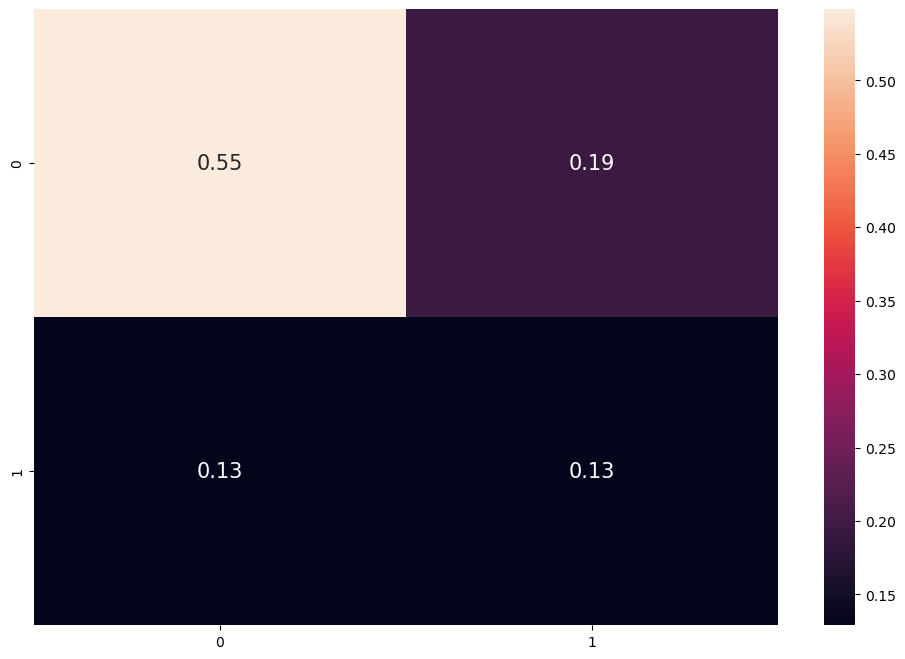

In [41]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib

# Handle missing values (replace NaNs with forward fill)
df.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Anxiety'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Save the trained Random Forest model as "Anxiety_model.pkl"
model_filename = "Anxiety_model.pkl"
joblib.dump(RF_model, model_filename)

# Load the model later if needed
loaded_model = joblib.load(model_filename)

# Predictions on the test set using the loaded model
predictions = loaded_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)


Logistic Regression: 0.557143 
Decision Tree: 0.628571 
RandomForest: 0.571429 
SVC: 0.628571 
********* Random Forest Results *********
Accuracy    :  0.7096774193548387
Recall      :  0.7096774193548387
Precision   :  0.6979646697388632
F1 Score    :  0.7030885380919698


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming you have loaded your data into the 'data' DataFrame

# Handle missing values (replace NaNs with forward fill)
#df.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)

features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Panic_Attack'

X = df[features]
y = df[target]
# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Predictions on the test set
predictions = RF_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)


Logistic Regression: 0.685714 
Decision Tree: 0.671429 
RandomForest: 0.585714 
SVC: 0.642857 
********* Random Forest Results *********
Accuracy    :  0.5806451612903226
Recall      :  0.5806451612903226
Precision   :  0.5624039938556068
F1 Score    :  0.5711278883550676


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.14      0.12      0.13         8

    accuracy                           0.58        31
   macro avg       0.43      0.43      0.43        31
weighted avg       0.56      0.58      0.57        31



<Axes: >

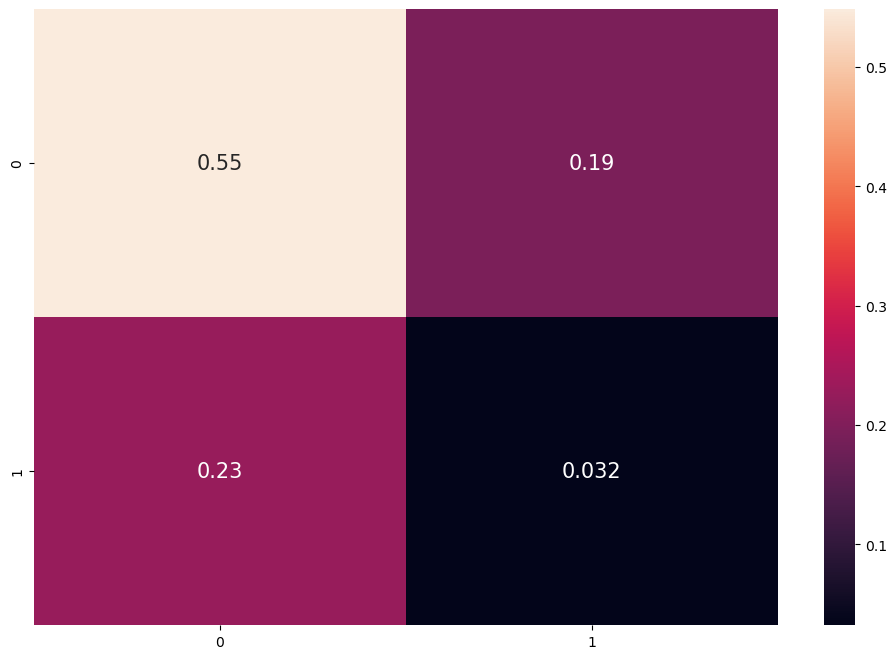

In [45]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib

# Assuming you have loaded your data into the 'data' DataFrame

# Handle missing values (replace NaNs with forward fill)
#df.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Panic_Attack'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Save the trained Random Forest model as "panicattack_model.pkl"
model_filename = "panicattack_model.pkl"
joblib.dump(RF_model, model_filename)

# Load the model later if needed
loaded_model = joblib.load(model_filename)

# Predictions on the test set using the loaded model
predictions = loaded_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)


Logistic Regression: 0.685714 
Decision Tree: 0.671429 
RandomForest: 0.557143 
SVC: 0.642857 
********* Random Forest Results *********
Accuracy    :  0.6774193548387096
Recall      :  0.6774193548387096
Precision   :  0.6140979689366786
F1 Score    :  0.6365591397849462


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

# Assuming you have loaded your data into the 'data' DataFrame

# Handle missing values (replace NaNs with forward fill)
#data.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Treatment'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on the test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Predictions on the test set
predictions = RF_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)

# Display classification report
print(classification_report(y_test, predictions))


Logistic Regression: 0.942857 
Decision Tree: 0.885714 


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


RandomForest: 0.914286 
SVC: 0.942857 
********* Random Forest Results *********
Accuracy    :  0.9354838709677419
Recall      :  0.9354838709677419
Precision   :  0.8751300728407908
F1 Score    :  0.9043010752688171
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.00      0.00      0.00         2

    accuracy                           0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

# Assuming you have loaded your data into the 'data' DataFrame

# Handle missing values (replace NaNs with forward fill)
#data.fillna(method='ffill', inplace=True)

# Separate the features (X) and target (y)
features = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']
target = 'Treatment'

X = df[features]
y = df[target]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipelines of models (a shortcut to fit and predict)
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Testing the Random Forest Model on the test set
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Save the trained Random Forest model as "treatmentmodel.pkl"
model_filename = "treatmentmodel.pkl"
joblib.dump(RF_model, model_filename)

# Load the model later if needed
loaded_model = joblib.load(model_filename)

# Predictions on the test set using the loaded model
predictions = loaded_model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)

# Display classification report
print(classification_report(y_test, predictions))


Logistic Regression: 0.942857 
Decision Tree: 0.885714 


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


RandomForest: 0.914286 
SVC: 0.942857 
********* Random Forest Results *********
Accuracy    :  0.9354838709677419
Recall      :  0.9354838709677419
Precision   :  0.8751300728407908
F1 Score    :  0.9043010752688171
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.00      0.00      0.00         2

    accuracy                           0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set 

In [49]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [50]:

import requests
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')

In [51]:
df = pd.read_csv('diabetes.csv')
df.head()

,PregnancyCount,GlucoseConcentration,BloodPressure,TricepsSkinThickness,InsulinLevel,BMI,DiabetestPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.shape


(768, 9)

In [53]:
df.dtypes

PregnancyCount                 int64
GlucoseConcentration           int64
BloodPressure                  int64
TricepsSkinThickness           int64
InsulinLevel                   int64
BMI                          float64
DiabetestPedigreeFunction    float64
Age                            int64
Diabetes                       int64
dtype: object

In [54]:
df.isnull().sum()

PregnancyCount               0
GlucoseConcentration         0
BloodPressure                0
TricepsSkinThickness         0
InsulinLevel                 0
BMI                          0
DiabetestPedigreeFunction    0
Age                          0
Diabetes                     0
dtype: int64

In [55]:
df.describe ()


,PregnancyCount,GlucoseConcentration,BloodPressure,TricepsSkinThickness,InsulinLevel,BMI,DiabetestPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
df.columns


Index(['PregnancyCount', 'GlucoseConcentration', 'BloodPressure',
       'TricepsSkinThickness', 'InsulinLevel', 'BMI',
       'DiabetestPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [57]:
print ("Number of rows: {}" . format (df.shape [0]))

Number of rows: 768


In [58]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PregnancyCount             768 non-null    int64  
 1   GlucoseConcentration       768 non-null    int64  
 2   BloodPressure              768 non-null    int64  
 3   TricepsSkinThickness       768 non-null    int64  
 4   InsulinLevel               768 non-null    int64  
 5   BMI                        768 non-null    float64
 6   DiabetestPedigreeFunction  768 non-null    float64
 7   Age                        768 non-null    int64  
 8   Diabetes                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df.corr()

,PregnancyCount,GlucoseConcentration,BloodPressure,TricepsSkinThickness,InsulinLevel,BMI,DiabetestPedigreeFunction,Age,Diabetes
PregnancyCount,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
GlucoseConcentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
TricepsSkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
InsulinLevel,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetestPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Graph'}>

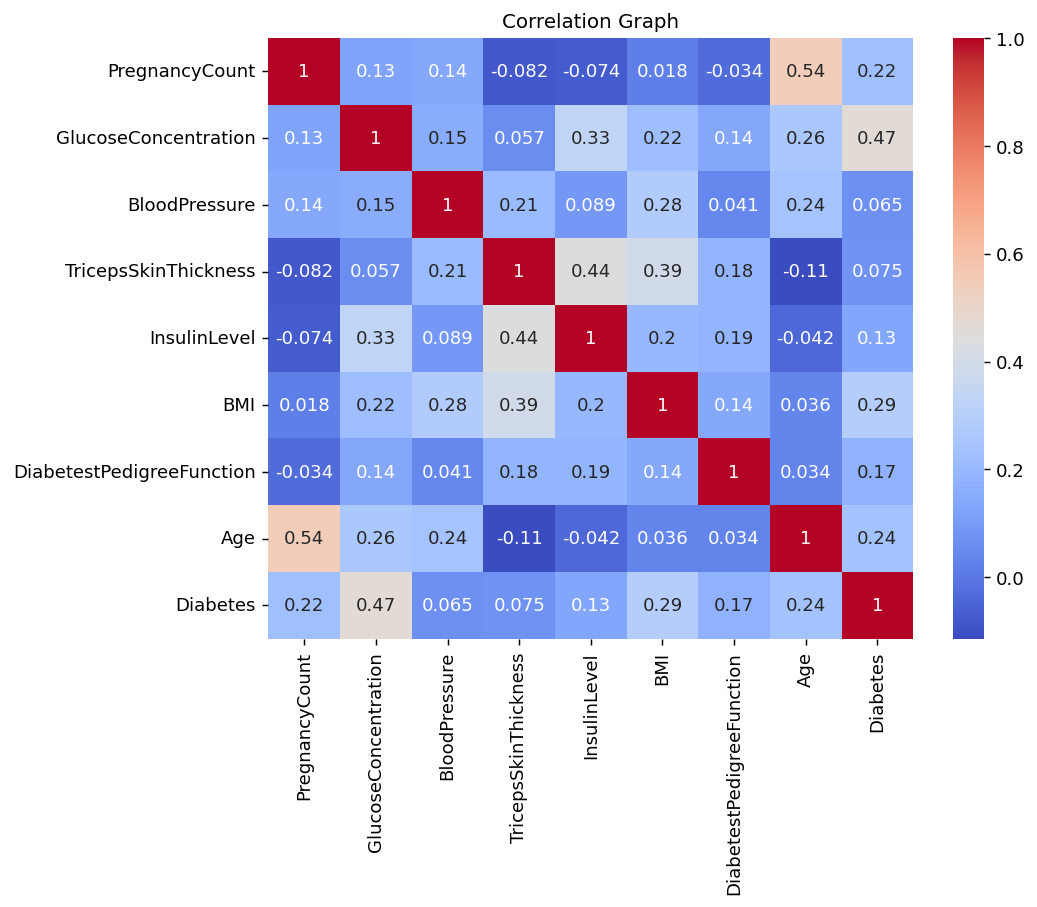

In [60]:
import seaborn as sns
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

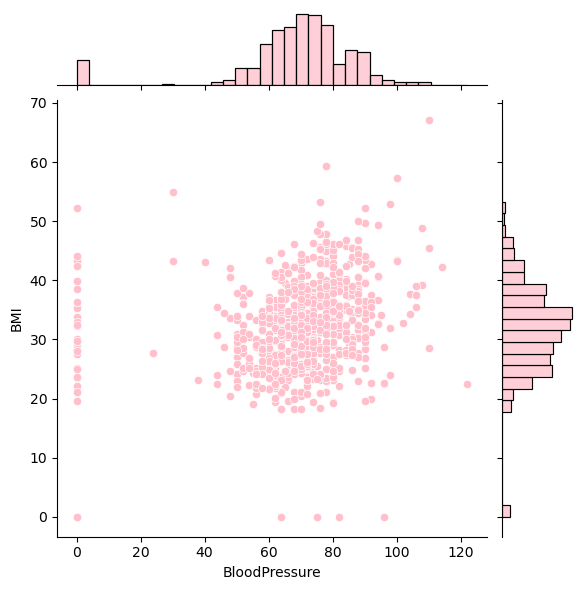

In [61]:
sns.jointplot(x='BloodPressure', y='BMI',data=df,color='pink')

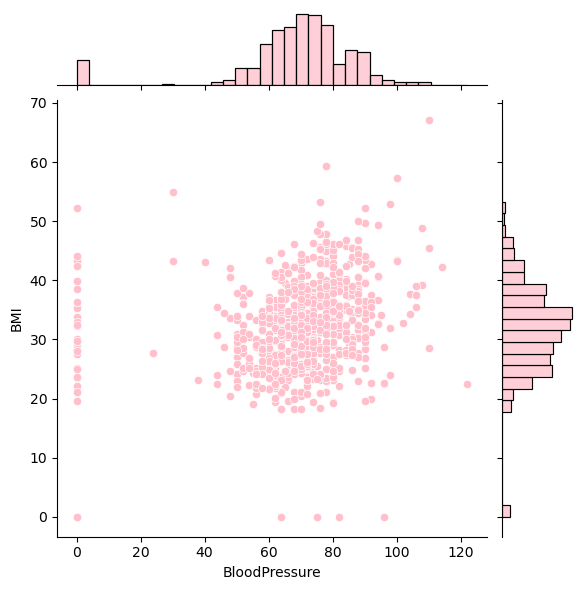

In [62]:
sns.jointplot(x='BloodPressure', y='BMI',data=df,color='pink')

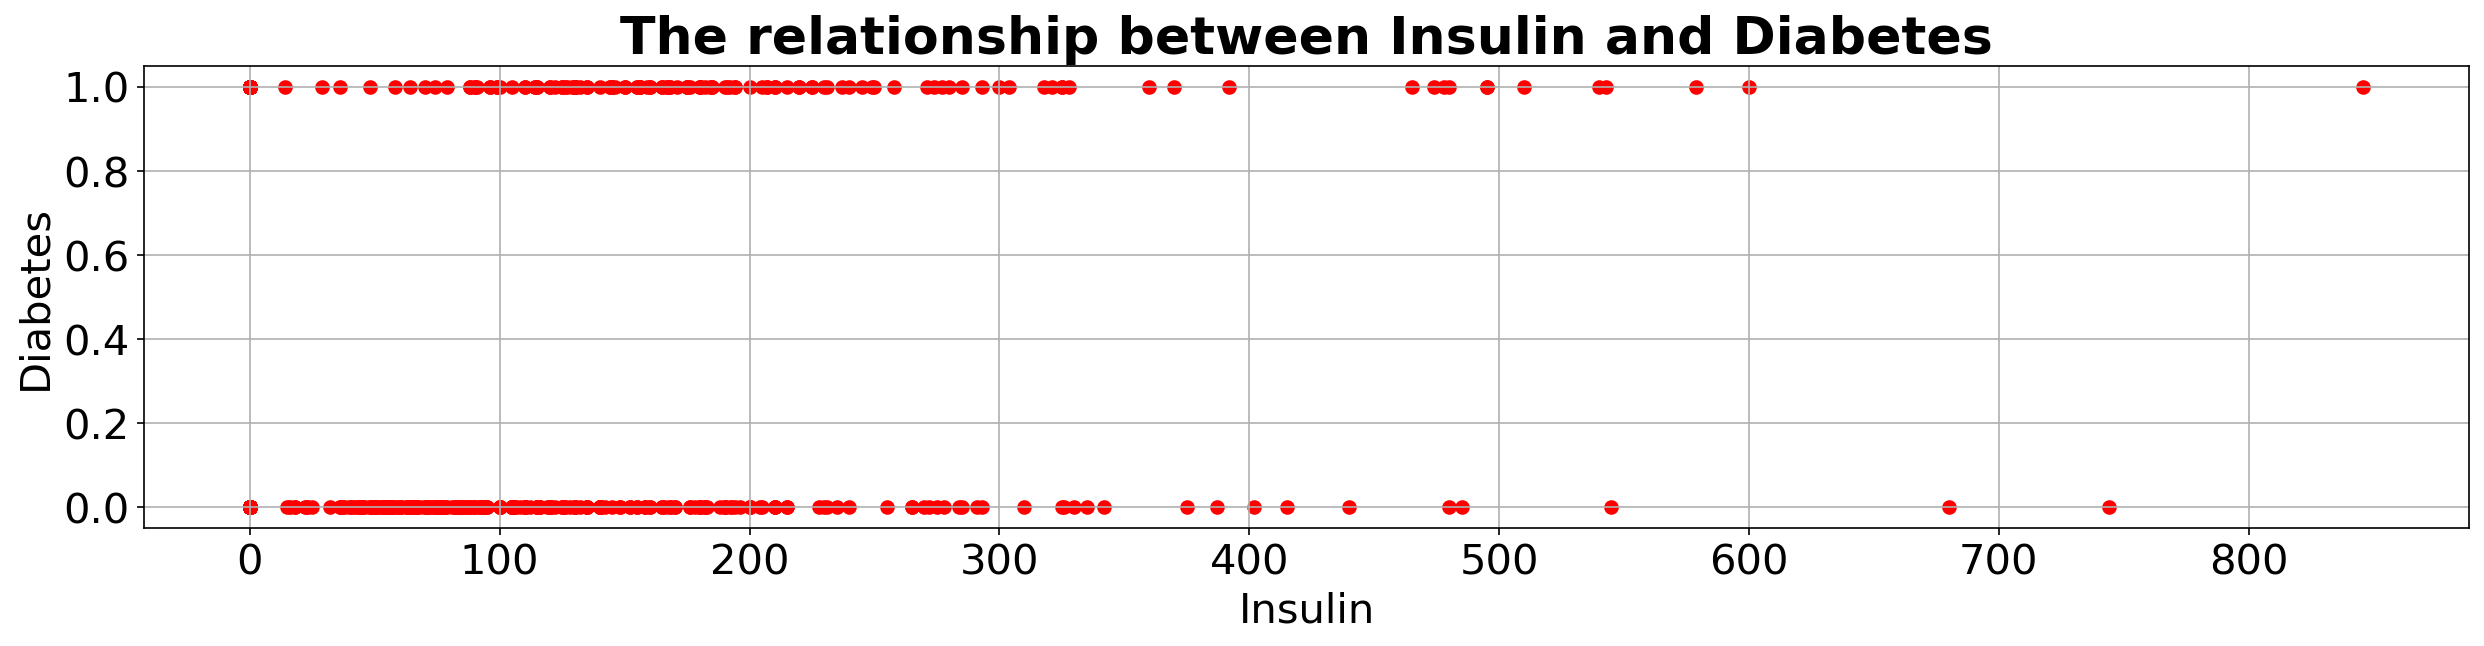

In [63]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["InsulinLevel"] , df["Diabetes"] , color = "red")
plt.title ("The relationship between Insulin and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 900 , 100) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Insulin', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()



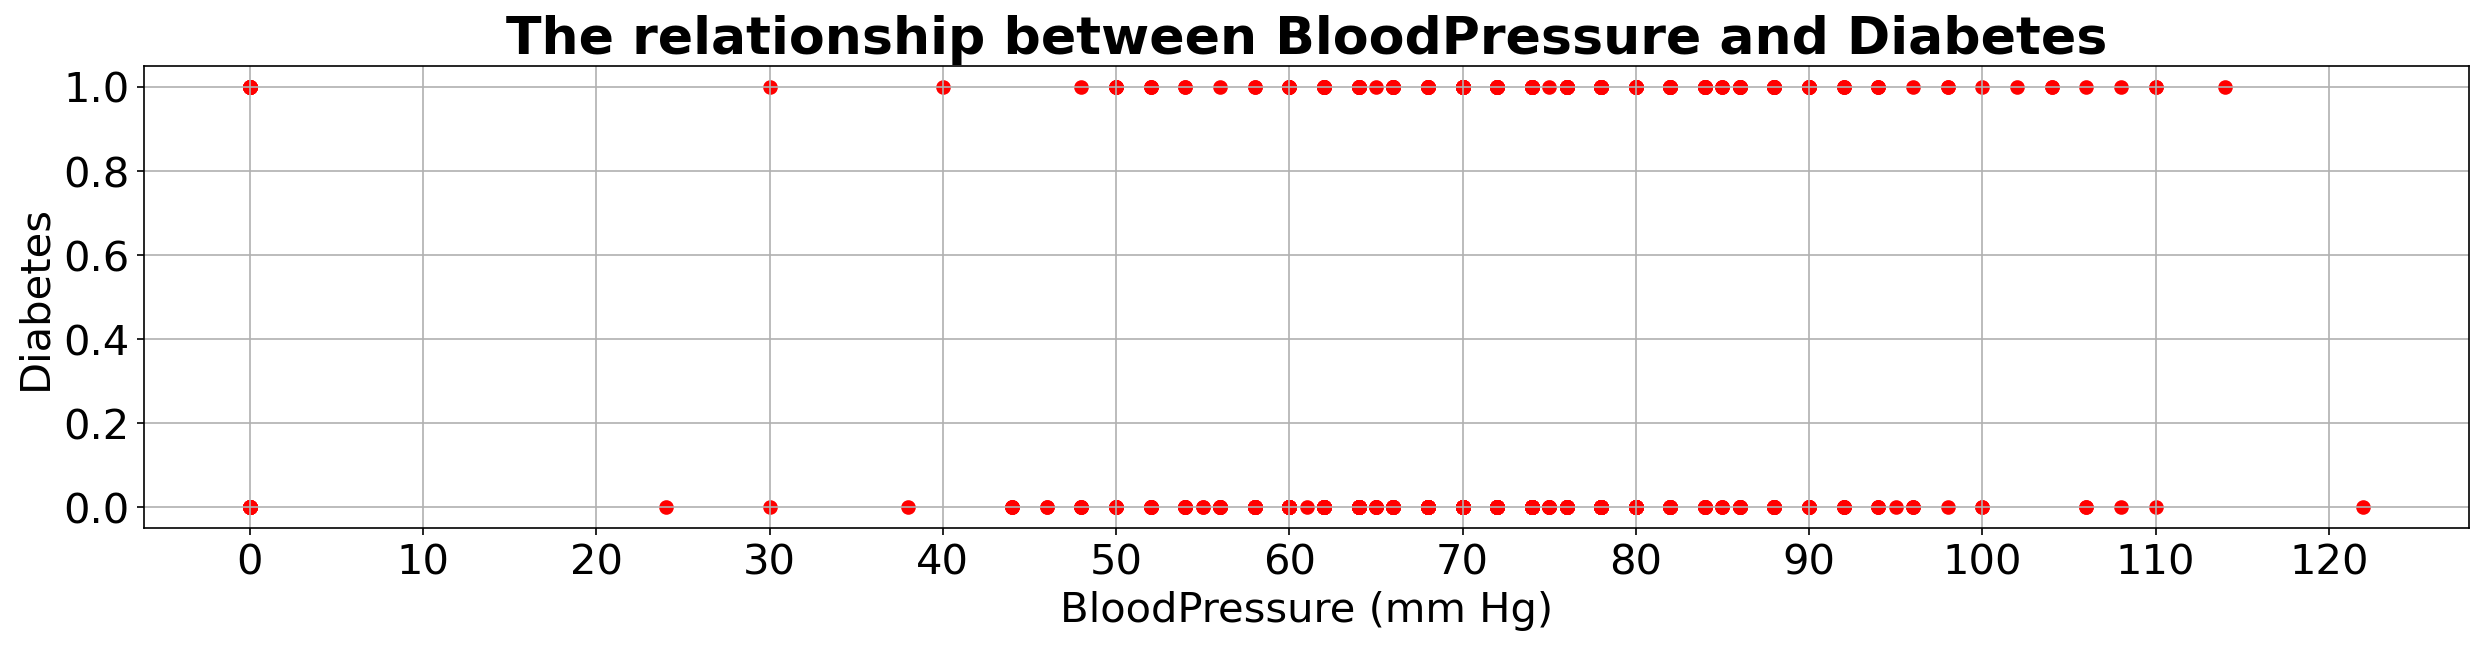

In [64]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BloodPressure"] , df["Diabetes"] , color = "red")
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure (mm Hg)', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

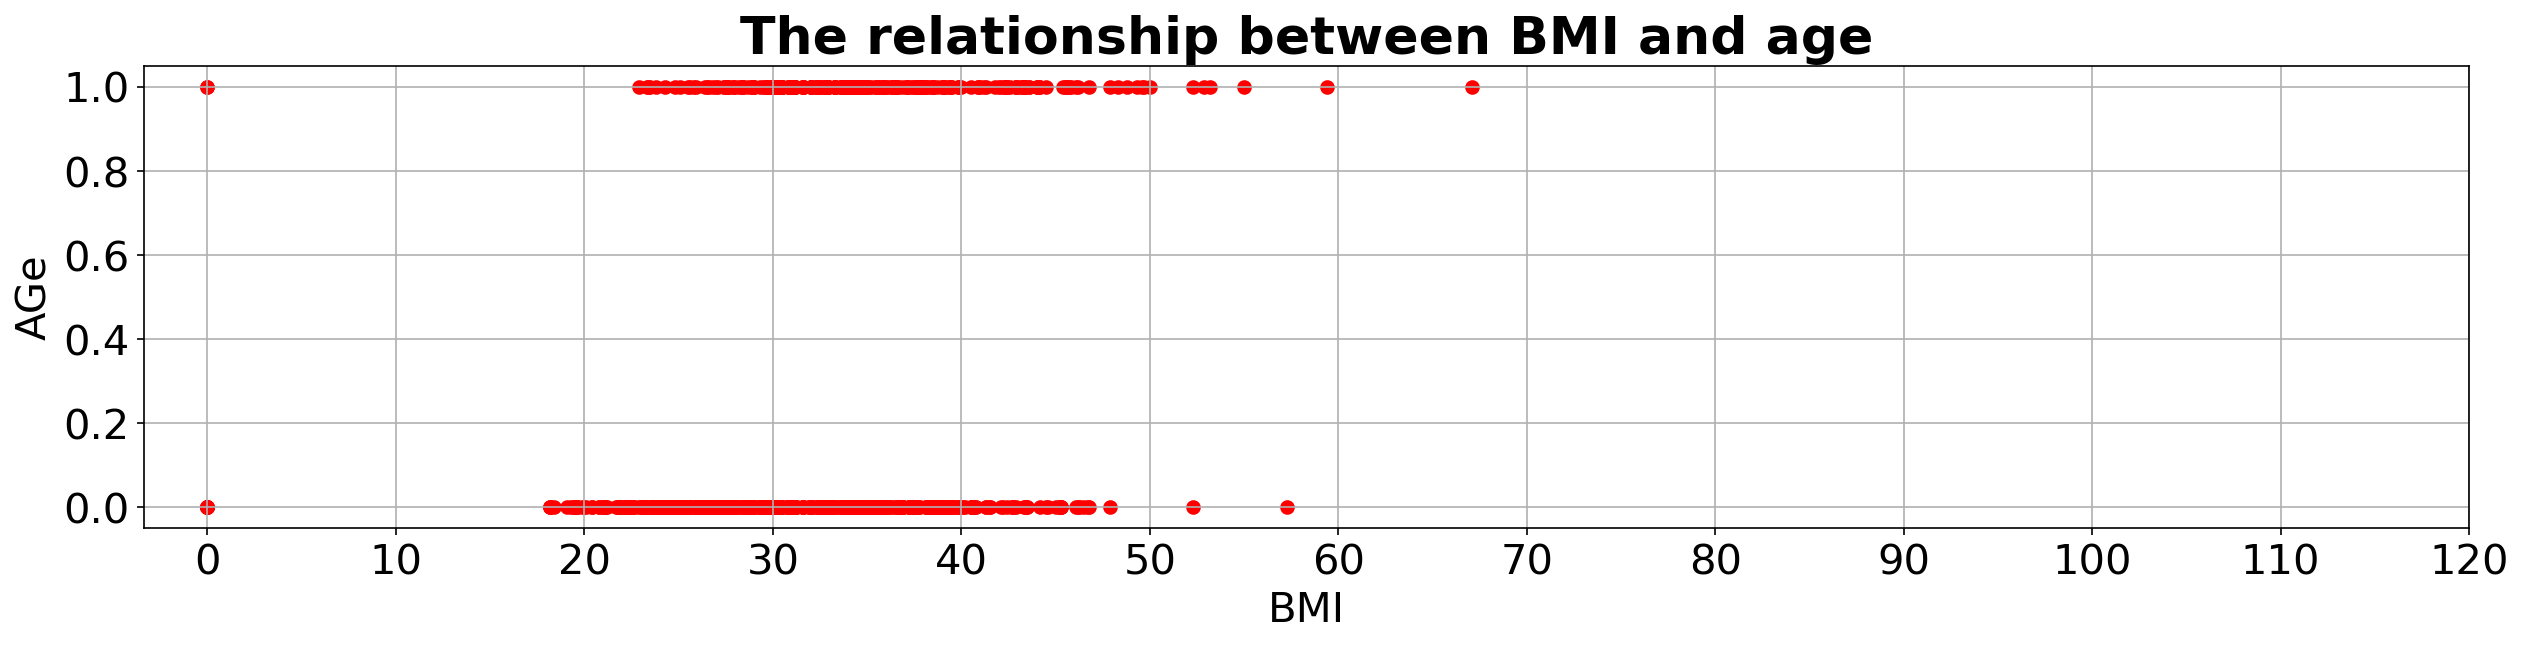

In [65]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BMI"] , df["Diabetes"] , color = "red")
plt.title ("The relationship between BMI and age" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20)
plt.ylabel ('AGe' , fontsize = 20)
plt.grid ()
plt.show ()

In [66]:
df.columns

Index(['PregnancyCount', 'GlucoseConcentration', 'BloodPressure',
       'TricepsSkinThickness', 'InsulinLevel', 'BMI',
       'DiabetestPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [67]:
X = df[["PregnancyCount" , "GlucoseConcentration" , "BloodPressure" , "TricepsSkinThickness" , "InsulinLevel" , "BMI", "DiabetestPedigreeFunction" , "Age"]] # Features
y = df.Diabetes

In [68]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)                      
y_pred = logreg.predict(X_test)                   
y_predicted_proba = logreg.predict_proba(X_test)

In [70]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Assuming you have already loaded and split your data

# Fit the StandardScaler on your training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the fitted scaler as a .pkl file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Your code for training and evaluating different models
def fit_and_evaluate(model): 
    model.fit(X_train_scaled, y_train)  # Fit the model
    train_preds = model.predict(X_train_scaled) # Make predictions on the training set and compute the accuracy
    train_acc = accuracy_score(y_train, train_preds)
    test_preds = model.predict(X_test_scaled) 
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc

res = []
models = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), SVC(random_state=42)]
for i in models:
    res.append(fit_and_evaluate(i))

for mod, result in zip(models, res):
    print(f'train and test accuracy of {mod} respectively is: \n {result} \n \n')


train and test accuracy of LogisticRegression(random_state=42) respectively is: 
 (0.7638888888888888, 0.8020833333333334) 
 

train and test accuracy of DecisionTreeClassifier(random_state=42) respectively is: 
 (1.0, 0.703125) 
 

train and test accuracy of RandomForestClassifier(random_state=42) respectively is: 
 (1.0, 0.8229166666666666) 
 

train and test accuracy of SVC(random_state=42) respectively is: 
 (0.8246527777777778, 0.7760416666666666) 
 



In [71]:
logreg.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [72]:
# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the scaler from a file
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)



In [73]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and split your data
X = df[["PregnancyCount", "GlucoseConcentration", "BloodPressure", "TricepsSkinThickness", "InsulinLevel", "BMI", "DiabetestPedigreeFunction", "Age"]] # Features
y = df.Diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

# Save the trained model as a .pkl file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)


In [85]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import joblib
import pickle 
import warnings
from sklearn.exceptions import InconsistentVersionWarning
from tkinter import PhotoImage


warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

def predict_mental_health_depression():
    try:
        marital_status = marital_status_entry.get()
        cgpa = cgpa_entry.get()
        gender = gender_entry.get()
        course = course_entry.get()
        year = year_entry.get()
        age = float(age_entry.get())

        input_data = [[gender, age, course, year, cgpa, marital_status]]

        # Load the pre-trained depression prediction model
        model = joblib.load("Depression_model.pkl")

        # Make the prediction
        prediction_result = model.predict(input_data)
        if prediction_result==[0]:
            prediction_text='You are suffering from Depression'
        else:
            prediction_text='You are not suffering from Depression'

        messagebox.showinfo("Result", f"Predicted Outcome: {prediction_text}")

    except Exception as e:
        messagebox.showerror("Error", "Please enter valid information")

def predict_mental_health_Anxiety():
    try:
        marital_status = marital_status_entry.get()
        cgpa = cgpa_entry.get()
        gender = gender_entry.get()
        course = course_entry.get()
        year = year_entry.get()
        age = float(age_entry.get())

        input_data = [[gender, age, course, year, cgpa, marital_status]]

        # Load the pre-trained anxiety prediction model
        model = joblib.load("Anxiety_model.pkl")

        # Make the prediction
        prediction_result = model.predict(input_data)
        if prediction_result == [0]:
            prediction_text = 'You are suffering from Anxiety'
        else:
            prediction_text = 'You are not suffering from Anxiety'

        messagebox.showinfo("Anxiety Prediction", prediction_text)

    except Exception as e:
        messagebox.showerror("Error", "Please enter valid information")

def predict_mental_health_Panic_Attack():
    try:
        marital_status = marital_status_entry.get()
        cgpa = cgpa_entry.get()
        gender = gender_entry.get()
        course = course_entry.get()
        year = year_entry.get()
        age = float(age_entry.get())

        input_data = [[gender, age, course, year, cgpa, marital_status]]

        # Load the pre-trained panic attack prediction model
        model = joblib.load("panicattack_model.pkl")

        # Make the prediction
        prediction_result = model.predict(input_data)
        if prediction_result == [0]:
            prediction_text = 'You are suffering from Panic Attack'
        else:
            prediction_text = 'You are at risk of experiencing panic attacks.'

        messagebox.showinfo("Panic Attack Prediction", prediction_text)

    except Exception as e:
        messagebox.showerror("Error", "Please enter valid information")

def predict_mental_health_Seek_Treatment():
    try:
        marital_status = marital_status_entry.get()
        cgpa = cgpa_entry.get()
        gender = gender_entry.get()
        course = course_entry.get()
        year = year_entry.get()
        age = float(age_entry.get())

        input_data = [[gender, age, course, year, cgpa, marital_status]]

        # Load the pre-trained seek treatment prediction model
        model = joblib.load("treatmentmodel.pkl")

        # Make the prediction
        prediction_result = model.predict(input_data)
        if prediction_result == [0]:
            prediction_text = 'You should seek treatment'
        else:
            prediction_text = 'You do not need to seek treatment'

        messagebox.showinfo("Seek Treatment Prediction", prediction_text)

    except Exception as e:
        messagebox.showerror("Error", "Please enter valid information")

def open_input_mental_health_screen():
    global marital_status_entry  # Declare it as a global variable here
    global gender_entry
    global age_entry
    global course_entry
    global year_entry
    global cgpa_entry

    root1 = tk.Toplevel(root)
    root1.title("Mental Health Prediction")
    root1.geometry("1000x600")
    
    gender_label = ttk.Label(root1, text="Gender (0 for Female, 1 for Male):")
    gender_label.pack(pady=5)
    gender_entry = ttk.Entry(root1)
    gender_entry.pack(pady=5)

    age_label = ttk.Label(root1, text="Age:")
    age_label.pack(pady=5)
    age_entry = ttk.Entry(root1)
    age_entry.pack(pady=5)

    course_label = ttk.Label(root1, text="Course (0 for 'Engineering', 1 for 'IT', etc.):")
    course_label.pack(pady=5)
    course_entry = ttk.Entry(root1)
    course_entry.pack(pady=5)

    year_label = ttk.Label(root1, text="Year (0 for Year 1, 1 for Year 2, etc.):")
    year_label.pack(pady=5)
    year_entry = ttk.Entry(root1)
    year_entry.pack(pady=5)

    cgpa_label = ttk.Label(root1, text="CGPA (0 for '3.00 - 3.49', 1 for '3.50 - 4.00', etc.):")
    cgpa_label.pack(pady=5)
    cgpa_entry = ttk.Entry(root1)
    cgpa_entry.pack(pady=5)

    marital_status_label = ttk.Label(root1, text="Marital Status (0 for No, 1 for Yes):")
    marital_status_label.pack(pady=5)
    marital_status_entry = ttk.Entry(root1)
    marital_status_entry.pack(pady=5)

    # Buttons to predict different mental health conditions and to show the courses 
    course_list_button = ttk.Button(root1, text="Course List", command=show_course_list)
    course_list_button.pack(pady=5)
    
    
    depression_button = ttk.Button(root1, text="Predict Depression", command=predict_mental_health_depression)
    depression_button.pack(pady=5)

    anxiety_button = ttk.Button(root1, text="Predict Anxiety", command=predict_mental_health_Anxiety)
    anxiety_button.pack(pady=5)

    panic_attack_button = ttk.Button(root1, text="Predict Panic Attack", command=predict_mental_health_Panic_Attack)
    panic_attack_button.pack(pady=5)

    seek_treatment_button = ttk.Button(root1, text="Predict Seek Doctor Treatment", command=predict_mental_health_Seek_Treatment)
    seek_treatment_button.pack(pady=5)
    

    
    root1.mainloop()
def show_course_list():
    courses = [
        (0, 'Engineering'), (1, 'Islamic Education'), (2, 'IT'), (3, 'Law'), (4, 'Mathematics'),
        (5, 'Pendidikan Islam'), (6, 'BCS'), (7, 'Human Resources'), (8, 'Irkhs'), (9, 'Psychology'),
        (10, 'KENMS'), (11, 'Accounting'), (12, 'ENM'), (13, 'Marine Science'), (14, 'KOE'),
        (15, 'Banking Studies'), (16, 'Business Administration'), (17, 'Usuluddin'), (18, 'TAASL'),
        (19, 'ALA'), (20, 'Biomedical Science'), (21, 'Koe'), (22, 'BENL'), (23, 'CTS'),
        (24, 'Economics'), (25, 'MHSC'), (26, 'Malcom'), (27, 'Kop'), (28, 'Human Sciences'),
        (29, 'Biotechnology'), (30, 'Communication'), (31, 'Diploma Nursing'), (32, 'Pendidikan Islam'),
        (33, 'Radiography'), (34, 'Fiqh'), (35, 'DIPLOMA TESL'), (36, 'Nursing')
    ]
    courses_text = "\n".join([f"{course[0]}: {course[1]}" for course in courses])
    messagebox.showinfo("Course List", courses_text)

def predict_diabetes():
    try:
        # Retrieve user input for each feature
        pregnancy_count = float(pregnancy_count_entry.get())
        glucose_concentration = float(glucose_concentration_entry.get())
        blood_pressure = float(blood_pressure_entry.get())
        triceps_skin_thickness = float(triceps_skin_thickness_entry.get())
        insulin_level = float(insulin_level_entry.get())
        bmi = float(bmi_entry.get())
        diabetes_pedigree_function = float(diabetes_pedigree_function_entry.get())
        age = float(age_entry.get())

        # Prepare input data for prediction
        input_data = [[pregnancy_count, glucose_concentration, blood_pressure, triceps_skin_thickness, insulin_level, bmi, diabetes_pedigree_function, age]]

        # Load the pre-trained diabetes prediction model
        model = joblib.load("model.pkl")

        # Load the scaler used for scaling the input features
        with open("scaler.pkl", "rb") as scaler_file:
            scaler = pickle.load(scaler_file)

        # Ensure the features are scaled using the loaded scaler
        input_data_scaled = scaler.transform(input_data)

        # Perform the prediction
        prediction_result = model.predict(input_data_scaled)
        if prediction_result==[0]:
            text='You do not have diabetes'
        else:
            text='You have diabetes. Please consult doctor'
        messagebox.showinfo("diabetes Prediction result", text)
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for all input fields.")

        
# Define a function for opening the diabetes prediction screen
def open_input_diabetes_screen():
    global pregnancy_count_entry, glucose_concentration_entry, blood_pressure_entry, triceps_skin_thickness_entry, insulin_level_entry, bmi_entry, diabetes_pedigree_function_entry, age_entry

    diabetes_window = tk.Toplevel(root)
    diabetes_window.title("Diabetes Prediction")
    diabetes_window.geometry("600x800")

    # Labels and entry widgets for diabetes prediction
    pregnancy_count_label = ttk.Label(diabetes_window, text="Pregnancy Count:")
    pregnancy_count_label.pack(pady=5)
    pregnancy_count_entry = ttk.Entry(diabetes_window)
    pregnancy_count_entry.pack(pady=5)

    glucose_concentration_label = ttk.Label(diabetes_window, text="Glucose Concentration:")
    glucose_concentration_label.pack(pady=5)
    glucose_concentration_entry = ttk.Entry(diabetes_window)
    glucose_concentration_entry.pack(pady=5)

    blood_pressure_label = ttk.Label(diabetes_window, text="Blood Pressure:")
    blood_pressure_label.pack(pady=5)
    blood_pressure_entry = ttk.Entry(diabetes_window)
    blood_pressure_entry.pack(pady=5)

    triceps_skin_thickness_label = ttk.Label(diabetes_window, text="Triceps Skin Thickness:")
    triceps_skin_thickness_label.pack(pady=5)
    triceps_skin_thickness_entry = ttk.Entry(diabetes_window)
    triceps_skin_thickness_entry.pack(pady=5)

    insulin_level_label = ttk.Label(diabetes_window, text="Insulin Level:")
    insulin_level_label.pack(pady=5)
    insulin_level_entry = ttk.Entry(diabetes_window)
    insulin_level_entry.pack(pady=5)

    bmi_label = ttk.Label(diabetes_window, text="BMI:")
    bmi_label.pack(pady=5)
    bmi_entry = ttk.Entry(diabetes_window)
    bmi_entry.pack(pady=5)

    diabetes_pedigree_function_label = ttk.Label(diabetes_window, text="Diabetes Pedigree Function:")
    diabetes_pedigree_function_label.pack(pady=5)
    diabetes_pedigree_function_entry = ttk.Entry(diabetes_window)
    diabetes_pedigree_function_entry.pack(pady=5)

    age_label = ttk.Label(diabetes_window, text="Age:")
    age_label.pack(pady=5)
    age_entry = ttk.Entry(diabetes_window)
    age_entry.pack(pady=5)

    # Button to predict diabetes
    predict_diabetes_button = ttk.Button(diabetes_window, text="Predict Diabetes", command=predict_diabetes)
    predict_diabetes_button.pack(pady=10)
    


# Create the main application window
root = tk.Tk()
root.title("Together - Diabetes and Mental Health Prediction")
root.geometry("600x800")
image = PhotoImage(file="together.png")

reduction_factor = 6  # Change this value to control the size
resized_image = image.subsample(reduction_factor)

image_label = tk.Label(root, image=resized_image)
image_label.pack()

# Labels and buttons for the main window
app_label = ttk.Label(root, text="Together - Diabetes and Mental Health Prediction", font=("Helvetica", 16))
app_label.pack(pady=20)

pointers_label = ttk.Label(root, text="""WELCOME TO TOGETHER APP!!!

1. Mental Health Prediction:
a. Use the "Mental Health Prediction" feature to assess your mental well-being.
b. Answer questions honestly to receive accurate results.
c. Remember, this is not a substitute for professional advice. Seek help if needed.

2. Diabetes Prediction:
a. Utilize the "Diabetes Prediction" tool to estimate your risk of diabetes.
b. Input your health data accurately to receive meaningful results.
c. Consult a healthcare professional for a comprehensive evaluation.""", font=("Helvetica", 10), foreground='green')
pointers_label.pack(pady=20)

mental_health_button = ttk.Button(root, text="Mental Health Prediction", command=open_input_mental_health_screen)
mental_health_button.pack(pady=20)

# Button to open the diabetes prediction screen
diabetes_button = ttk.Button(root, text="Diabetes Prediction", command=open_input_diabetes_screen)
diabetes_button.pack(pady=20)

root.mainloop()


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/mac/anaconda3/lib/python3.